# Quantum Algorithms

In [18]:
from qiskit import *
from qiskit.tools.visualization import plot_histogram
from qiskit.tools.monitor import job_monitor

### Quantum Teleportation
-Teleportion of information from one qubit to another

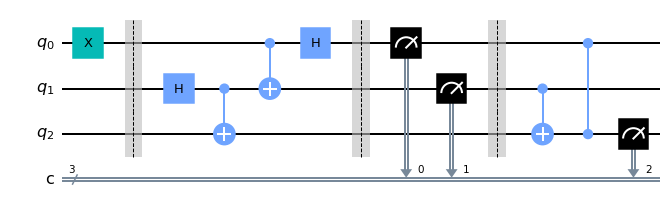

In [37]:
qc = QuantumCircuit(3,3)
qc.x(0)
qc.barrier()

qc.h(1)
qc.cx(1,2)


qc.cx(0,1)
qc.h(0)
qc.barrier()


qc.measure([0,1],[0,1])
qc.barrier()

qc.cx(1,2)
qc.cz(0,2)

qc.measure(2,2)
qc.draw('mpl')

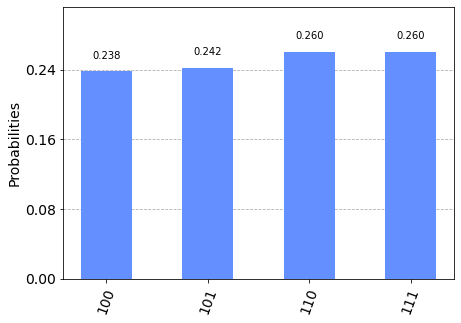

In [38]:
result = execute(qc, backend=simu, shots=1024).result()
counts = result.get_counts()
plot_histogram(counts)

## Bernstein-vazirani Algoritms

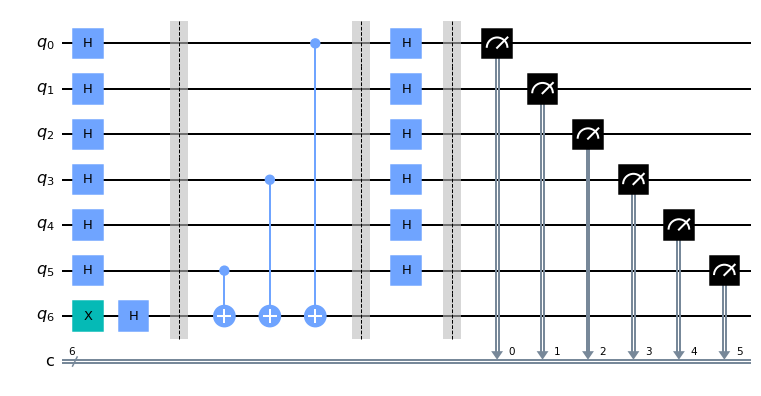

In [41]:
secretnumber = '101001'
qc = QuantumCircuit(6+1, 6)

qc.h([0,1,2,3,4,5])
qc.x(6)
qc.h(6)
qc.barrier()

qc.cx(5,6)
qc.cx(3,6)
qc.cx(0,6)
qc.barrier()

qc.h([0,1,2,3,4,5])
qc.barrier()

qc.measure([0,1,2,3,4,5], [0,1,2,3,4,5])
qc.draw('mpl')

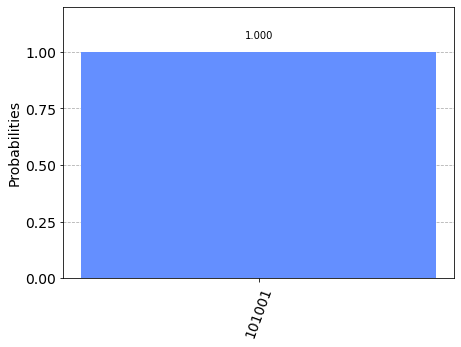

In [43]:
result = execute(qc, backend=simu).result()
plot_histogram(result.get_counts(qc))

### Shor's Algorithm

In [46]:
from qiskit.aqua import QuantumInstance
from qiskit.aqua.algorithms import Shor

In [52]:
quan_ins = QuantumInstance(backend=simu, shots=1000)
my_shor = Shor(N=15, a=2, quantum_instance=quan_ins)

In [51]:
Shor.run(my_shor)

{'factors': [[3, 5]], 'total_counts': 57, 'successful_counts': 14}

## QSVM

In [72]:
#!pip3 install qiskit-aqua[cvx]

  ERROR: Command errored out with exit status 1:
   command: 'c:\users\ashok\appdata\local\programs\python\python39\python.exe' -u -c 'import sys, setuptools, tokenize; sys.argv[0] = '"'"'C:\\Users\\ashok\\AppData\\Local\\Temp\\pip-install-p_o29178\\ecos\\setup.py'"'"'; __file__='"'"'C:\\Users\\ashok\\AppData\\Local\\Temp\\pip-install-p_o29178\\ecos\\setup.py'"'"';f=getattr(tokenize, '"'"'open'"'"', open)(__file__);code=f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' bdist_wheel -d 'C:\Users\ashok\AppData\Local\Temp\pip-wheel-dduxsmsc'
       cwd: C:\Users\ashok\AppData\Local\Temp\pip-install-p_o29178\ecos\
  Complete output (12 lines):
  running bdist_wheel
  running build
  running build_py
  creating build
  creating build\lib.win-amd64-3.9
  creating build\lib.win-amd64-3.9\ecos
  copying src\ecos\ecos.py -> build\lib.win-amd64-3.9\ecos
  copying src\ecos\version.py -> build\lib.win-amd64-3.9\ecos
  copying src\ecos\__init__.p


  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
    Preparing wheel metadata: started
    Preparing wheel metadata: finished with status 'done'
  Running setup.py clean for ecos
Failed to build ecos scs



      define_macros = [('HAVE_CBLAS', None)]
  Could not locate executable g77
  Could not locate executable f77
  Could not locate executable ifort
  Could not locate executable ifl
  Could not locate executable f90
  Could not locate executable DF
  Could not locate executable efl
  Could not locate executable gfortran
  Could not locate executable f95
  Could not locate executable g95
  Could not locate executable efort
  Could not locate executable efc
  Could not locate executable flang
  don't know how to compile Fortran code on platform 'nt'
  C:\Users\ashok\AppData\Local\Temp\pip-build-env-2lx250gq\overlay\Lib\site-packages\numpy\distutils\system_info.py:1914: UserWarning:
      Optimized (vendor) Blas libraries are not found.
      Falls back to netlib Blas library which has worse performance.
      A better performance should be easily gained by switching
      Blas library.
    if self._calc_info(blas):
  C:\Users\ashok\AppData\Local\Temp\pip-build-env-2lx250gq\overlay\Lib\

In [74]:
from matplotlib import pyplot as plt
import numpy as np
from qiskit.ml.datasets import ad_hoc_data
from qiskit import BasicAer
from qiskit.circuit.library import ZZFeatureMap
from qiskit.aqua.algorithms import QSVM
from qiskit.aqua.utils import split_dataset_to_data_and_labels, map_label_to_class_name

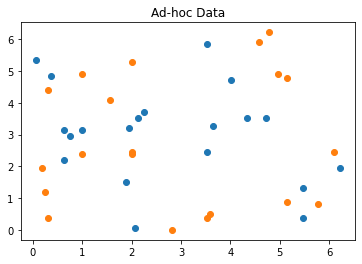

{'A': 0, 'B': 1}


In [75]:
feature_dim = 2
training_dataset_size = 20
testing_dataset_size = 20
random_seed = 10598
shot = 10000

sample_Total, training_input, test_input, class_labels = ad_hoc_data(training_size=training_dataset_size, test_size=testing_dataset_size,gap=0.3, n=feature_dim, plot_data=True)

datapoints, class_to_label = split_dataset_to_data_and_labels(test_input)
print(class_to_label)

In [76]:
feature_map = ZZFeatureMap(feature_dim, reps=2)
svm=QSVM(feature_map, training_input, test_input, None)
svm.random_seed = random_seed
quantum_instance = QuantumInstance(simu, shots=shot, seed_simulator=random_seed, seed_transpiler=random_seed)
result = svm.run(quantum_instance)

MissingOptionalLibraryError: "The 'CVXPY' library is required to use 'optimize_svm'. You can install it with 'pip install 'qiskit-aqua[cvx]''.  No module named 'cvxpy'."

In [ ]:
print('kernel matrix during training:')
kernel_matrix = result['kernel_matrix_training']
img = plt.imshow(kernel_matrix,interpolation='nearest', origin='upper')
plt.show()

In [ ]:
predicted_labels=svm.predict(datapoints[0])
predicted classes = map_label_to_class_name(predicted_labels, svm.label_to_class)
print(f"ground truth:{datapoints[1]}")
print(f"prediction:{predicted_labels}")
print("testing success ratio:", result['testing_accuracy'])

### HLL algorithm